In [1]:
#Data Description:
#The data is related with direct marketing campaigns of a Portuguese banking institution. 
#The marketing campaigns were based on phone calls. Often, more than one contact to the same 
#client was required, in order to access if the product (bank term deposit) would be ('yes') or 
#not ('no') subscribed.

#Domain:
#Banking

#Context:
#Leveraging customer information is paramount for most businesses. In the case of a bank, 
#attributes of customers like the ones mentioned below can be crucial in strategizing a marketing 
#campaign when launching a new product

#Attribute Information: 
#
# age(numeric)

# job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management',
# 'retired','self-employed','services','student','technician','unemployed','unknown')

# marital : marital status (categorical: 'divorced','married','single','unknown';
# note: 'divorced' means divorced or widowed)

# education(categorical:
# 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

# default: has credit in default? (categorical: 'no','yes','unknown')

# balance: average yearly balance, in euros (numeric)

# housing: has housing loan? (categorical: 'no','yes','unknown')

# loan: has personal loan? (categorical: 'no','yes','unknown')

# contact: contact communication type (categorical: 'cellular','telephone')

# day: last contact day of the month (numeric 1 -31)

# month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

# duration: last contact duration, in seconds (numeric). Important note: this
# attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. Also, after the end of the 
# call y is obviously known. Thus, this input should only be included for benchmark purposes and 
# should be discarded if the intention is to have a realistic predictive model.

# campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

# pdays: number of days that passed by after the client was last contacted from a previous campaign 
# (numeric; 999 means client was not previously contacted)

# previous: number of contacts performed before this campaign and for this client (numeric)

# poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# target: has the client subscribed a term deposit? (binary: "yes","no")

In [176]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
from Custom import Perform_EDA as EDA
import itertools


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree



# calculate accuracy measures and confusion matrix
from sklearn import metrics


In [64]:
Source = pandas.read_csv("bank-full.csv")

In [65]:
#Understand the data set

#Data skimmed through to see what are the variables present, data type, shape, column names, mixed data types, 
#missing values etc

Source.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [66]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [67]:
Source.shape

(45211, 17)

In [68]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [69]:
#### this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
# Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
# Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to 
# have a realistic predictive model

Source.drop(['duration'], inplace=True, axis=1)

In [70]:
# Certain variables are more relevant if they are categorical variable than numerical variables. 
# We will convert such categorical variables to numeric variabes

Source['pdays'] = Source['pdays'].astype('category')
Source['Target'] = Source['Target'].astype('category')

In [71]:
EDA.EDA(Source)

Total Missing Values =  0.0 Data Points, Contributing to  0.0 %
Columns with values as 0

 0    previous
dtype: object 


Columns with numnber of Zeros

previous    = 36954


count         mean          std     min   25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0  33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0  72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0   8.0   16.0    21.0   
campaign  45211.0     2.763841     3.098021     1.0   1.0    2.0     3.0   
previous  45211.0     0.580323     2.303441     0.0   0.0    0.0     0.0   

               max     Kurtosis   Skewness     Range     IQR  Missing Values  
age           95.0     0.319570   0.684818      77.0    15.0             0.0  
balance   102127.0   140.751547   8.360308  110146.0  1356.0             0.0  
day           31.0    -1.059897   0.093079      30.0    13.0             0.0  
campaign      63.0    39.249651   4.898650      62.0     2.0             0.0  
previous     275.0  4506.860660  41.846454     275.0     0.0             0.0

Columns that are int32,int64 =  Index(['age', 'balance', 'day', 'campaign', 'previous'], dtype='object')
Columns that are flaot32,float64 =  Index([], dtype='object')
Columns that are objects =  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


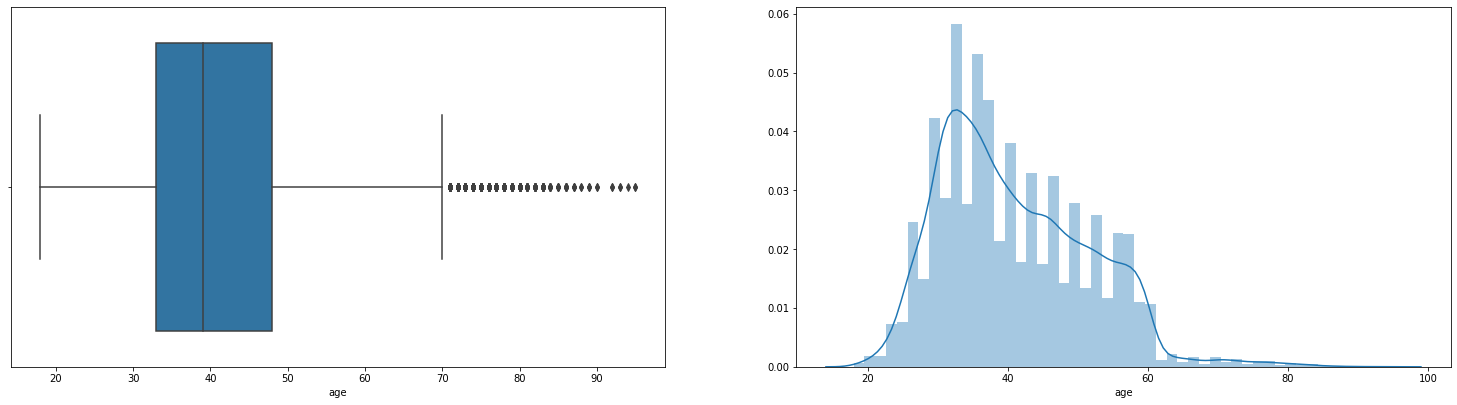

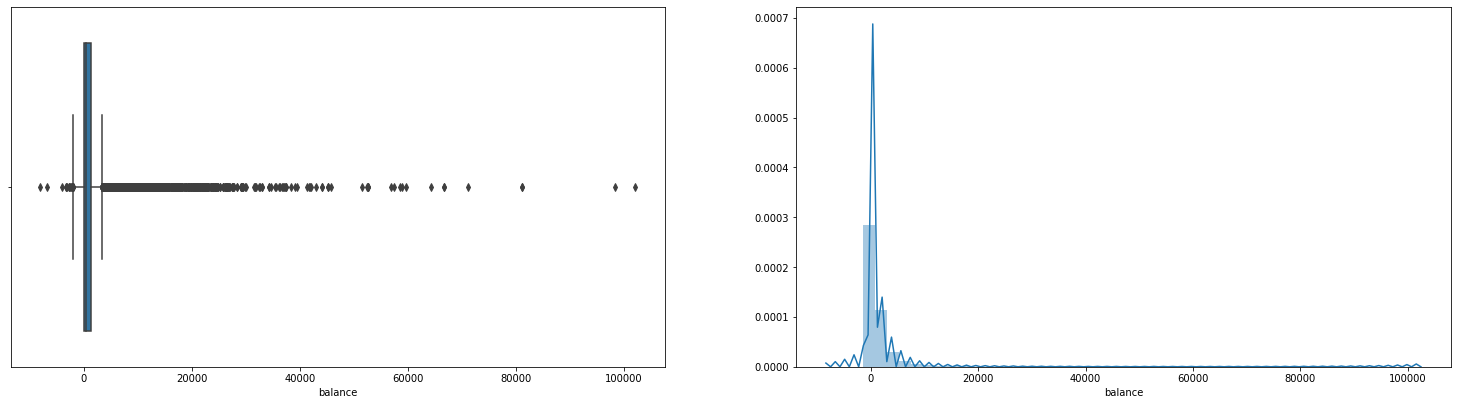

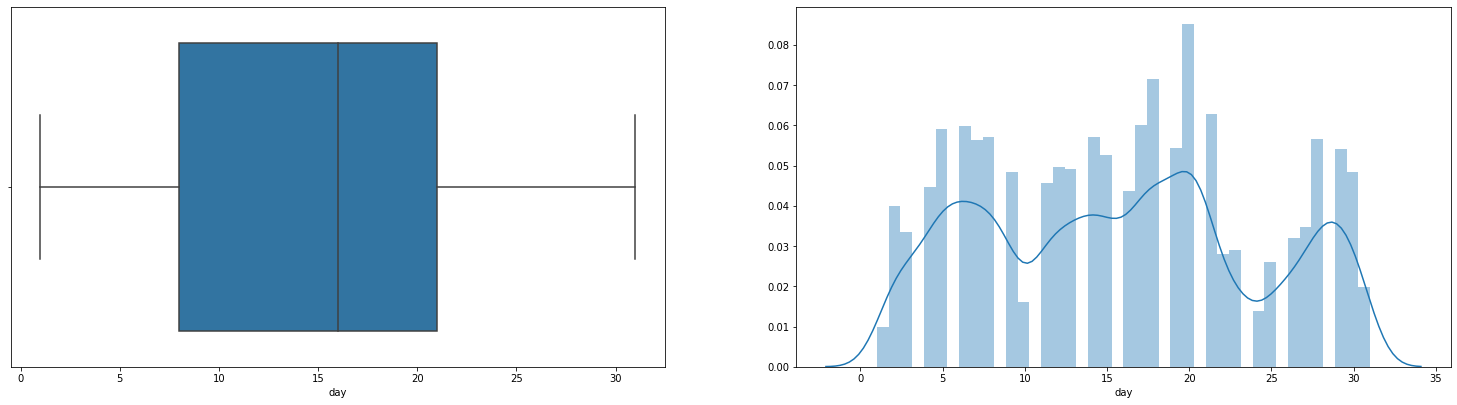

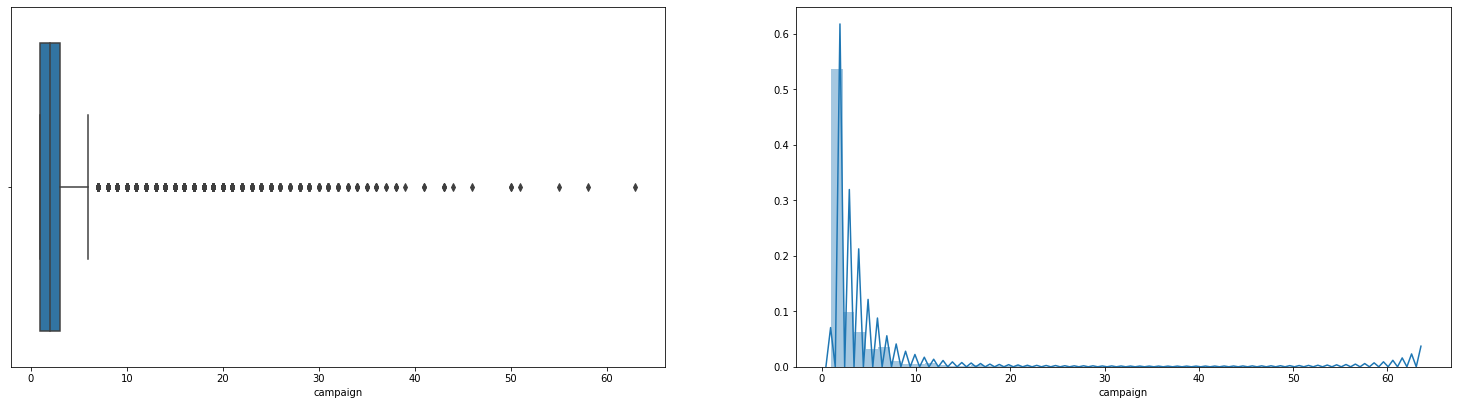

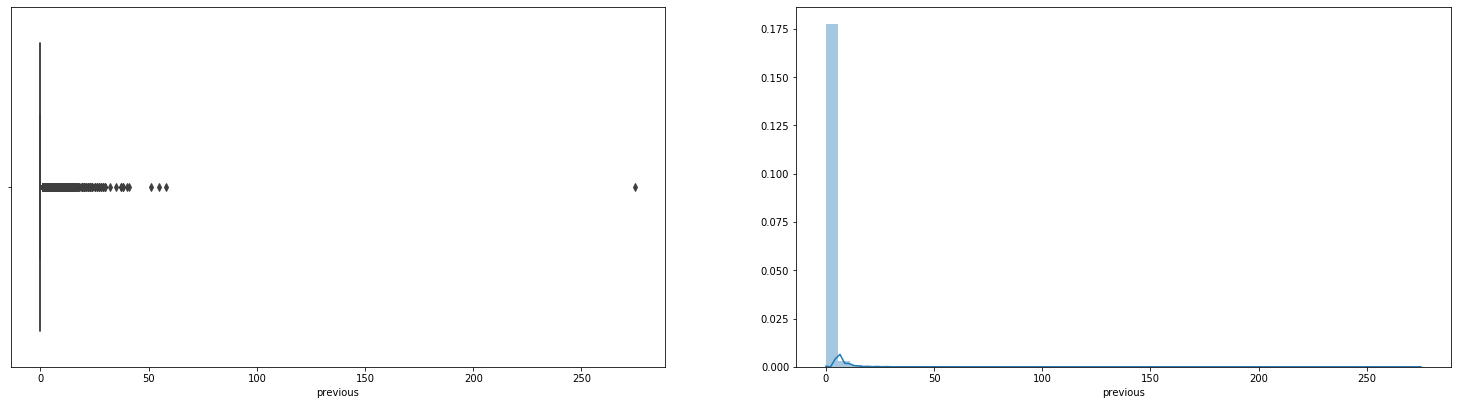

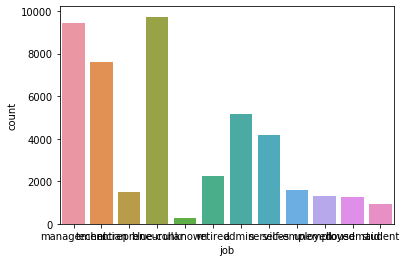

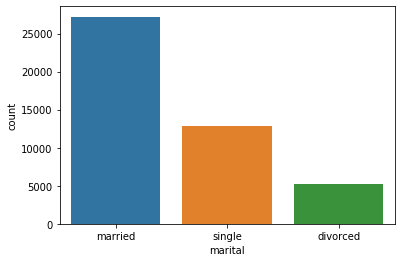

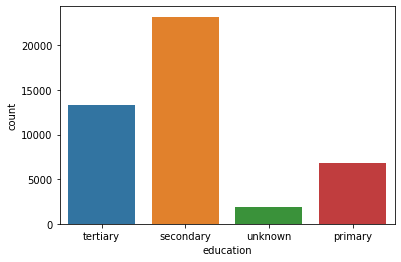

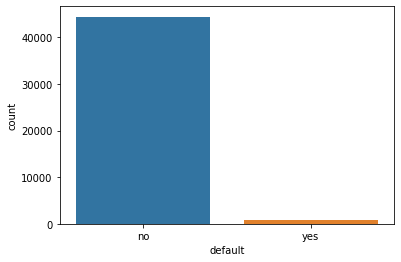

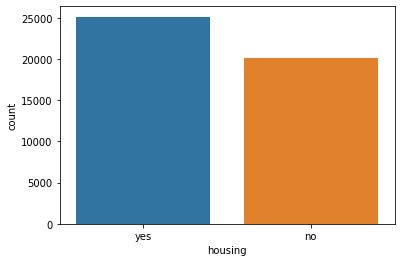

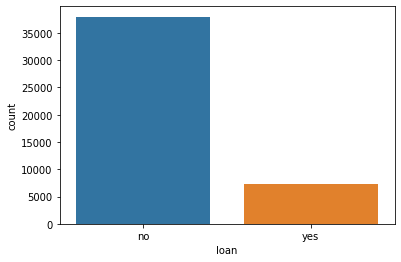

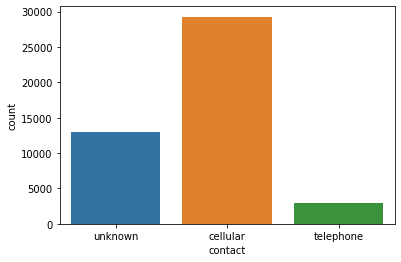

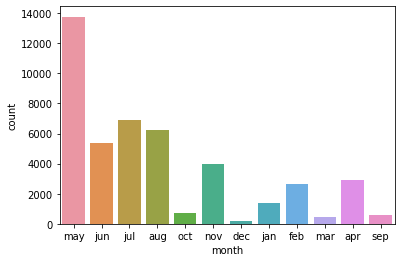

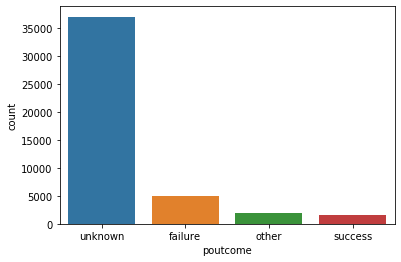

In [72]:
EDA.univariate_plots(Source)

In [ ]:
# Age column has some outliers. The median age is about 40 years. There are some customers above 90 years of age. 
# This data might have to be checked

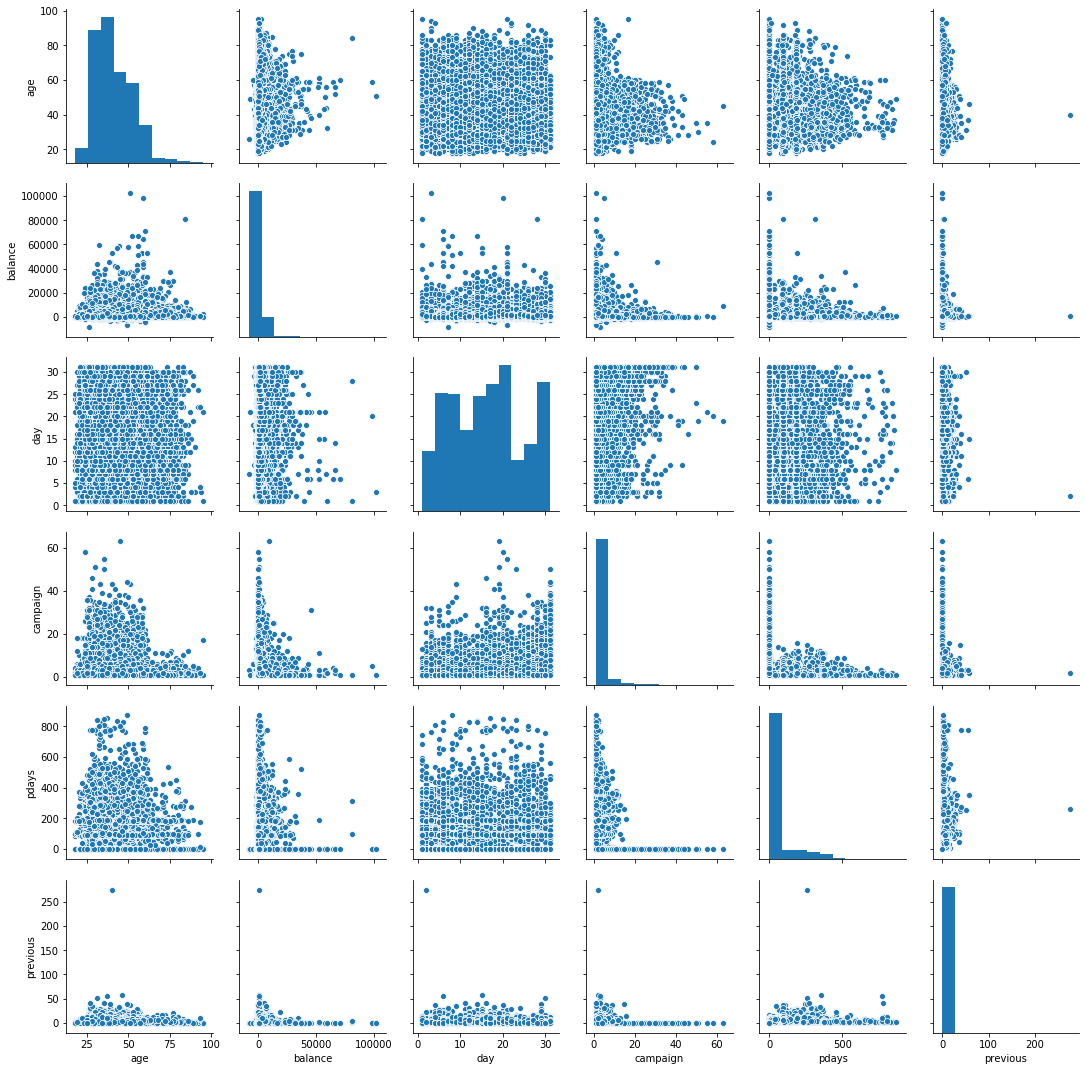

In [16]:
#compare all attributes visually to check for relationships that can be exploited
Source_attr = Source.iloc[:,0:17]
sns.pairplot(Source_attr)

In [ ]:
# The distribution of all numerical variables other than age is highly skewed - 
# hence we might want to transform or dispose some of these variables

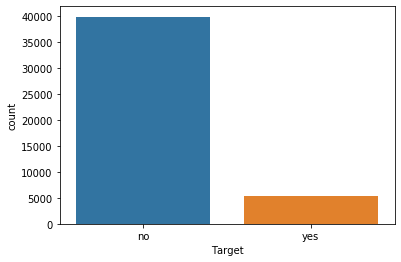

In [73]:
sns.countplot(Source['Target'])

In [74]:
Source['Target'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

In [19]:
# The response rate is only 11.6%. Hence the Target variable has a high class imbalance. 
# Hence accuracy will not be a reliable model performance measure.

# FN is very critical for this business case because a false negative is a customer who will 
# potentially subscribe for a loan but who has been classified as 'will not subscribe'. 
# Hence the most relevant model performance measure is recall

In [76]:
Source.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'Target'],
      dtype='object')

In [77]:
# Group numerical variables by mean for the classes of Target variable
numpy.round(Source.groupby(['Target']).mean(), 1)

age  balance   day  campaign  previous
Target                                         
no      40.8   1303.7  15.9       2.8       0.5
yes     41.7   1804.3  15.2       2.1       1.2

In [ ]:
# The mean balance is higher for customers who subscribe to the term deposit compared to those who dont

In [78]:
# Bivariate analysis using crosstab

pandas.crosstab(Source['job'], Source['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target               no       yes
job                              
student        0.713220  0.286780
retired        0.772085  0.227915
unemployed     0.844973  0.155027
management     0.862444  0.137556
admin.         0.877973  0.122027
self-employed  0.881571  0.118429
unknown        0.881944  0.118056
technician     0.889430  0.110570
services       0.911170  0.088830
housemaid      0.912097  0.087903
entrepreneur   0.917283  0.082717
blue-collar    0.927250  0.072750

In [ ]:
# The highest conversion is for students (28%) and lowest is for blue-collar(7%)

In [79]:
pandas.crosstab(Source['marital'], Source['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target          no       yes
marital                     
single    0.850508  0.149492
divorced  0.880545  0.119455
married   0.898765  0.101235

In [80]:
pandas.crosstab(Source['education'], Source['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target           no       yes
education                    
tertiary   0.849936  0.150064
unknown    0.864297  0.135703
secondary  0.894406  0.105594
primary    0.913735  0.086265

In [81]:
print(pandas.crosstab(Source['default'], Source['Target'], normalize='index').sort_values(by='yes',ascending=False ))
print(Source['default'].value_counts(normalize=True))

Target         no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804
no     0.981973
yes    0.018027
Name: default, dtype: float64


In [26]:
# Since default - yes is only 0.018% of the data and the conversion is also comparitively lower for 
# default - yes, we can remove this column

In [82]:
Source.drop(['default'], axis=1, inplace=True)

In [83]:
pandas.crosstab(Source['day'], Source['Target'], normalize='index').sort_values(by='yes',ascending=False )[0:10]

Target        no       yes
day                       
1       0.720497  0.279503
10      0.769084  0.230916
30      0.826948  0.173052
22      0.829834  0.170166
3       0.835032  0.164968
4       0.840830  0.159170
25      0.841667  0.158333
12      0.847785  0.152215
13      0.847950  0.152050
2       0.859242  0.140758

In [84]:
pandas.crosstab(Source['month'], Source['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target        no       yes
month                     
mar     0.480084  0.519916
dec     0.532710  0.467290
sep     0.535406  0.464594
oct     0.562331  0.437669
apr     0.803206  0.196794
feb     0.833522  0.166478
aug     0.889867  0.110133
jun     0.897772  0.102228
nov     0.898489  0.101511
jan     0.898788  0.101212
jul     0.909065  0.090935
may     0.932805  0.067195

In [85]:
Source.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'poutcome',
       'Target'],
      dtype='object')

In [86]:
pandas.crosstab(Source['housing'], Source['Target'], normalize='index').sort_values(by='yes',ascending=False )

Target         no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000

In [39]:
# List out the high level findings from bivariate analysis that could provide pointers to feature selection

In [87]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pandas.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

In [88]:
#Binning campaign
cut_points = [2,3,4]
labels = ["<=2","3","4",">4"]
Source['campaign_range'] = binning(Source['campaign'], cut_points, labels)
Source['campaign_range'].value_counts()

<=2    30049
>4      6119
3       5521
4       3522
Name: campaign_range, dtype: int64

In [89]:
Source.drop(['campaign'], axis=1, inplace=True)
Source.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'pdays', 'previous', 'poutcome', 'Target',
       'campaign_range'],
      dtype='object')

In [90]:
X = Source.drop("Target" , axis=1)
y = Source["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
X = pandas.get_dummies(X, drop_first=True)

In [47]:
Source.shape

(45211, 15)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [92]:
X_train.shape,X_test.shape

((31647, 599), (13564, 599))

In [93]:
X_train.columns

Index(['age', 'balance', 'day', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed',
       ...
       'pdays_842', 'pdays_850', 'pdays_854', 'pdays_871', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'campaign_range_3',
       'campaign_range_4', 'campaign_range_>4'],
      dtype='object', length=599)

In [94]:
#instantiating decision tree as the default model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [106]:
# Is the model an overfit model? 
y_predict = dt_model.predict(X_test)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test , y_test))

1.0
0.8328664110881746


In [96]:
# Note: - Decision Tree is a non-parametric algorithm and hence prone to overfitting easily. 
# This is evident from the difference
# in scores in training and testing

# In ensemble techniques, we want multiple instances (each different from the other) and each instance 
# to be overfit!!!  
# hopefully, the different instances will do different mistakes in classification and when we club them, their
# errors will get cancelled out giving us the benefit of lower bias and lower overall variance errors.

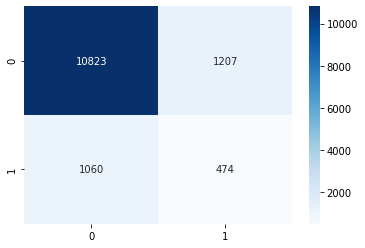

In [112]:
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, cmap='Blues',fmt='g')

In [113]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

          no       0.91      0.90      0.91     12030
         yes       0.28      0.31      0.29      1534

    accuracy                           0.83     13564
   macro avg       0.60      0.60      0.60     13564
weighted avg       0.84      0.83      0.84     13564



In [ ]:
# The recall score is relatively low and this has to be improved in the model

In [114]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [122]:
print (pandas.DataFrame(clf_pruned.feature_importances_, columns = ["Imp"], index = X_train.columns))

                          Imp
age                  0.000000
balance              0.000000
day                  0.000000
previous             0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_married      0.000000
marital_single       0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
housing_yes          0.121288
loan_yes             0.000000
contact_telephone    0.000000
contact_unknown      0.202585
month_aug            0.000000
month_dec            0.000000
month_feb            0.000000
month_jan            0.000000
month_jul            0.000000
month_jun            0.000000
...                       ...
pdays_761            0.000000
pdays_769 

In [131]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system


Banking_Tree_File = open('Banking_Demo.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Banking_Tree_File, feature_names = list(X_train), class_names = list(target_names))
Banking_Tree_File.close()

In [132]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

system("dot -Tpng Banking_Demo.dot -o Banking_Demo.png")
Image("Banking_Demo.png")

In [133]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [139]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


#feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
#feat_imp = pandas.DataFrame.from_dict(feat_imp_dict, orient='index')
#feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)


In [164]:
acc_DT = accuracy_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned, average="binary", pos_label="yes")

In [143]:
# Overfitting is reduced after pruning, but recall has drastically reduced

In [153]:
## Apply the Random forest model and print the accuracy of Random forest Model

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [159]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
recall_RF = recall_score(y_test, pred_RF, average="binary", pos_label="yes")

In [157]:
## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

abcl = AdaBoostClassifier( n_estimators= 200, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [166]:
pred_AB = abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB, pos_label='yes')

In [181]:
## Apply Bagging Classifier Algorithm and print the accuracy


bgcl = BaggingClassifier(n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [182]:
pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG, pos_label='yes')

In [177]:
gbcl = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [178]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB, pos_label='yes')

#  Compare Models


In [196]:
Compare = [[acc_DT,recall_DT],
           [acc_RF,recall_RF],[acc_AB,recall_AB],
            [acc_BG,recall_BG], [acc_GB,recall_GB]]

In [197]:
pandas.DataFrame(Compare, columns= ['Accuracy','Recall'], index=['Decision Tree','Random Forest','Adaboost','Bagging','Gradient Boost'])

Accuracy    Recall
Decision Tree   0.893689  0.134941
Random Forest   0.892583  0.189048
Adaboost        0.893984  0.151239
Bagging         0.893689  0.233377
Gradient Boost  0.894205  0.197523

In [ ]:
# Bagging gives overall best model performance. However, please note that the recall is still 
# very low and will have to be improved